In [51]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np



# Load the housing data
housing_data = pd.read_csv("texas_zipcode_only_housing_data_monthly.csv")





                   new_listing_count
month_date_yyyymm                   
2016-07-01                   38244.0
2016-08-01                   34864.0
2016-09-01                   30326.0
2016-10-01                   30260.0
2016-11-01                   25138.0
...                              ...
2022-11-01                   26876.0
2022-12-01                   20782.0
2023-01-01                   30002.0
2023-02-01                   30866.0
2023-03-01                   35258.0

[81 rows x 1 columns]


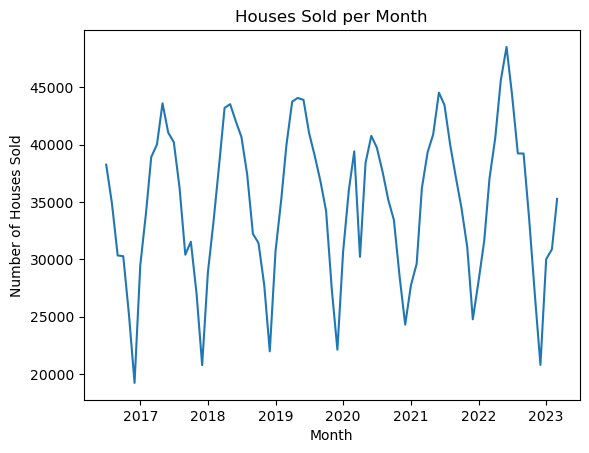

In [56]:
#Houses Sold per Month

# Convert the month_date_yyyymm column to a datetime object
housing_data["month_date_yyyymm"] = pd.to_datetime(housing_data["month_date_yyyymm"], format="%Y%m")

# Group the data by month and calculate the total number of houses sold
houses_sold_per_month = housing_data.groupby("month_date_yyyymm")["new_listing_count"].sum()

# Display the data in a table
print(houses_sold_per_month.to_frame())

# Plot the data as a line graph
plt.plot(houses_sold_per_month.index, houses_sold_per_month.values)
plt.xlabel("Month")
plt.ylabel("Number of Houses Sold")
plt.title("Houses Sold per Month")
plt.show()


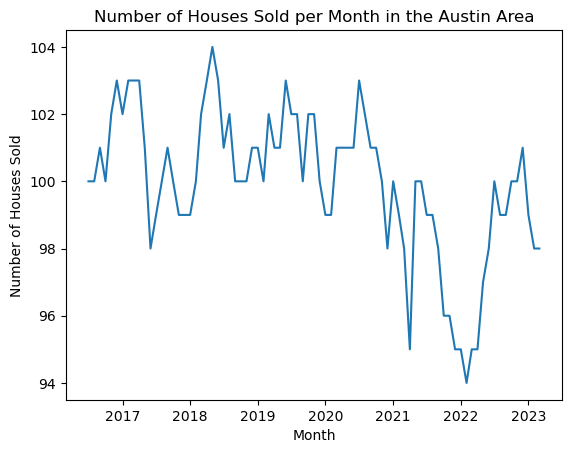

In [45]:
#Number of Houses Sold in austin area

# Convert the 'month_date_yyyymm' column to a datetime data type
df['month_date_yyyymm'] = pd.to_datetime(df['month_date_yyyymm'], format='%Y%m')

# Convert the 'postal_code' column to string data type
df['postal_code'] = df['postal_code'].astype(str)

# Filter the data to only include zip codes in the Austin area
austin_zips = df['postal_code'].str.startswith(('787', '786'))
df_austin = df[austin_zips]

# Group the data by month and count the number of rows in each group
houses_sold_austin = df_austin.groupby(['month_date_yyyymm'])['postal_code'].count()

# Plot the number of houses sold per month in the Austin area
plt.plot(houses_sold_austin.index, houses_sold_austin.values)
plt.title('Number of Houses Sold per Month in the Austin Area')
plt.xlabel('Month')
plt.ylabel('Number of Houses Sold')
plt.show()


In [57]:
# Number of Houses Sold by Price Range per Month in Central Texas

# Select only the columns we need
df = df[['month_date_yyyymm', 'postal_code', 'median_listing_price', 'new_listing_count']]

# Convert month_date_yyyymm to datetime format
df['month_date_yyyymm'] = pd.to_datetime(df['month_date_yyyymm'], format='%Y%m')

# Group by month and median_listing_price_range
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, float('inf')]
labels = ['$0-$100k', '$100k-$200k', '$200k-$300k', '$300k-$400k', '$400k-$500k', '$500k-$600k', '$600k-$700k', '$700k-$800k', '$800k-$900k', '$900k-$1M', '$1M+']
df['price_range'] = pd.cut(df['median_listing_price'], bins=bins, labels=labels)
df_grouped = df.groupby(['month_date_yyyymm', 'price_range']).sum().reset_index()

# Pivot the table to get price ranges as columns
df_pivot = df_grouped.pivot(index='month_date_yyyymm', columns='price_range', values='new_listing_count')
df_pivot = df_pivot.fillna(0)

# Plot the data as a stacked area chart
fig = px.area(df_pivot, title='Number of Houses Sold by Price Range per Month in Central Texas', labels={'month_date_yyyymm': 'Month', 'value': 'Number of Houses Sold'})
fig.update_layout(
    xaxis_tickformat='%b %Y',
    legend=dict(title='Price Range')
)
fig.show()

# Plot a geospatial plot of the number of houses sold per ZIP code
df_geo = df_grouped.groupby('postal_code').sum().reset_index()
fig = px.choropleth(df_geo, geojson='texas_zip_codes.geojson', locations='postal_code', color='new_listing_count',
                    color_continuous_scale='YlGnBu', range_color=(0, 500))
fig.update_layout(title='Number of Houses Sold by ZIP Code in Central Texas', margin={'r':0,'l':0,'b':0})
fig.show()




C:\Users\smyej\AppData\Local\Temp\ipykernel_2648\2627820282.py:28: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



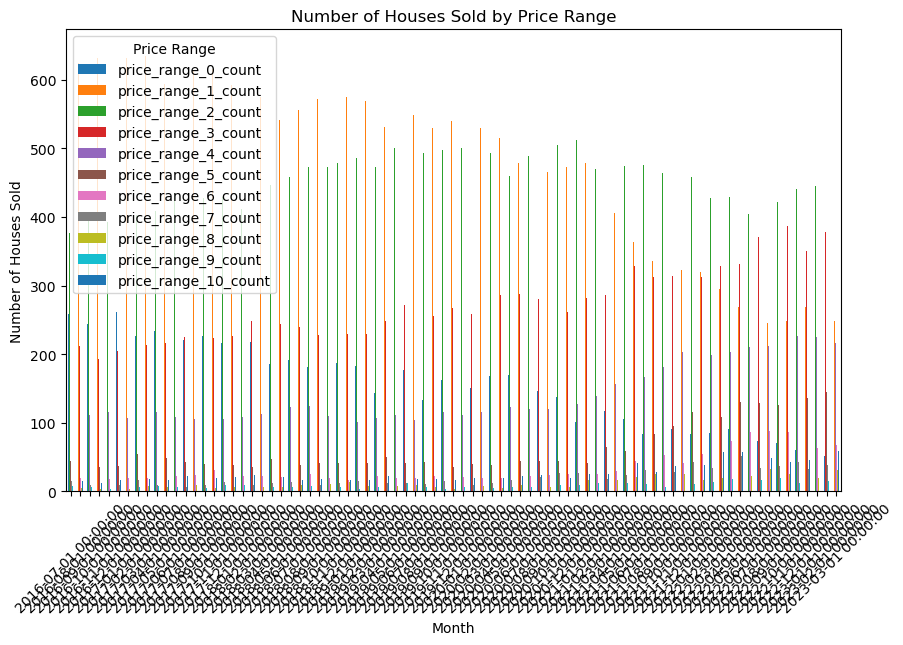

In [ ]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('texas_zipcode_only_housing_data_monthly.csv')

# Convert the date column to datetime format
df['month_date_yyyymm'] = pd.to_datetime(df['month_date_yyyymm'], format='%Y%m')

# Define the price ranges
price_ranges = [(0, 100000), (100000, 200000), (200000, 300000), (300000, 400000), (400000, 500000), (500000, 600000), (600000, 700000), (700000, 800000), (800000, 900000), (900000, 1000000), (1000000, np.inf)]

# Initialize a dictionary to store the results
results = {}

# Loop through the price ranges and count the number of houses sold per month
for i, (start_price, end_price) in enumerate(price_ranges):
    mask = (df['median_listing_price'] >= start_price) & (df['median_listing_price'] < end_price)
    data = df.loc[mask, ['month_date_yyyymm', 'median_listing_price']]
    data = data.groupby('month_date_yyyymm').count()
    data.columns = [f'price_range_{i}_count']
    results[f'price_range_{i}'] = data

# Merge the results into a single dataframe
merged = pd.concat(list(results.values()), axis=1)

# Plot the results
merged.plot(kind='bar', figsize=(10, 6), rot=45)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Houses Sold')
plt.title('Number of Houses Sold by Price Range')
plt.legend(title='Price Range', loc='upper left')

# Show the plot
plt.show()

